In [1]:
import os
from OPSIM import SETFOS_processing
import frgtools.misc as frgm
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from matplotlib import style
mpl.rcParams.update(mpl.rcParamsDefault)
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import scipy.io as sio
import csv

In [6]:
SETFOS_rootdir = os.path.join('SETFOS_Simulation_Outputs', '20200913')#, 'Textured_Glass_ITO_PTB7PCBM_Ag_sweep')
# SETFOS_rootdir = os.path.join('SETFOS_Simulation_Outputs', '20200917', 'topsweep_on1umtin', 'i')
Spectrum_fp = os.path.join('Spectrum_Import','AM15.csv')
Abs_profile_fp = os.path.join(SETFOS_rootdir,'optW.txt')

In [8]:
junction = 1
start_string = '# Si'
df=SETFOS_processing.SETFOS_load(Abs_profile_fp, junction, start_string)
SETFOS_processing.abs_to_pabs(Spectrum_fp, df,junction)
SETFOS_processing.pabs_integrate(Spectrum_fp, df,junction)
SETFOS_processing.SETFOS_plot(df,9,junction)

KeyError: 9

In [4]:
df['AOI'][9]

100.0

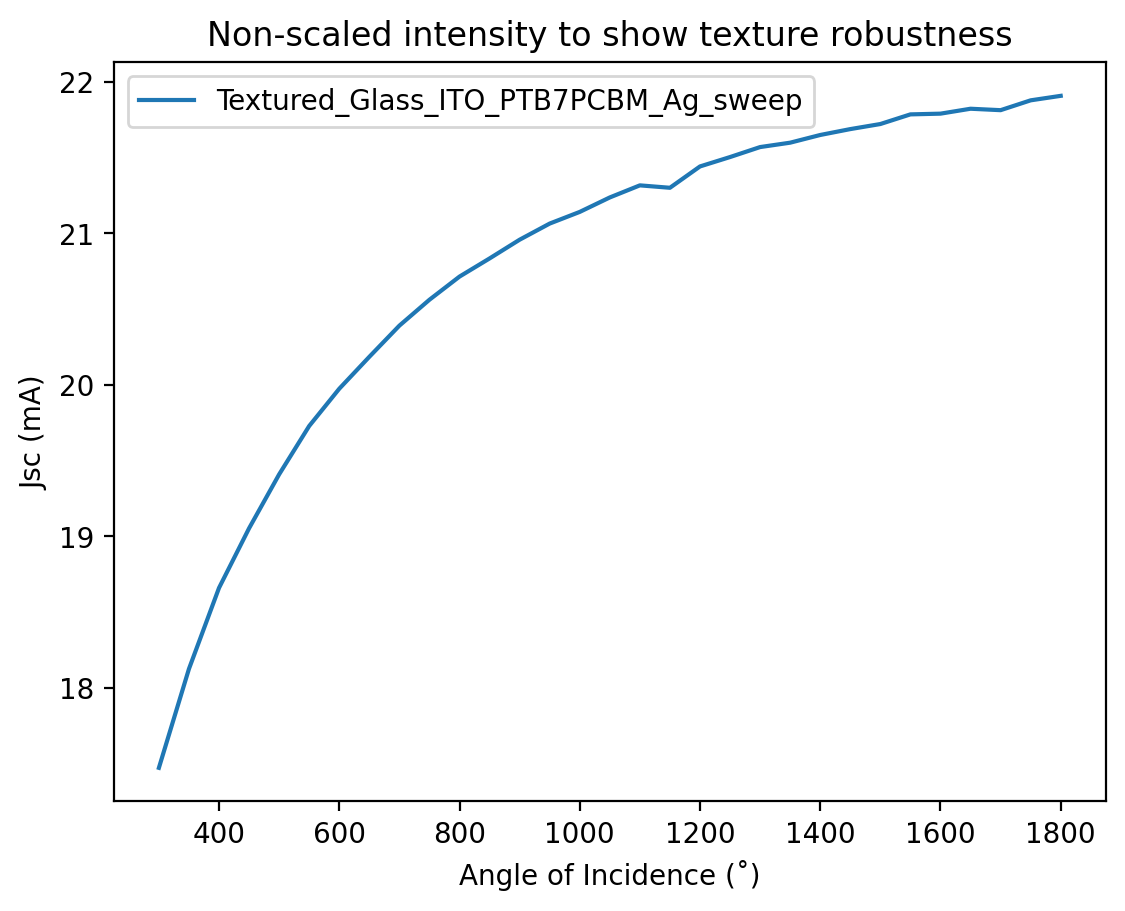

In [15]:
plt.plot(df['AOI'], df['PSK_Jsc'], label='Textured_Glass_ITO_PTB7PCBM_Ag_sweep')
# plt.plot(df['AOI'], df['Si_Jsc'], label='Si')

plt.title('Non-scaled intensity to show texture robustness')
# plt.ylim(0,23)
# plt.xticks(np.arange(300,1800,150))  
# plt.xlim(0,90)

plt.xlabel('Angle of Incidence (˚)')
plt.ylabel('Jsc (mA)')
plt.legend()
# plt.legend(bbox_to_anchor=(1,1), loc="upper right")
plt.show() 

plt.show()

In [17]:
df;

In [18]:
# df['scaled_Si_Jsc'] = df['Si_Jsc']*np.cos(np.deg2rad(df['AOI']))
# df['scaled_PSK_Jsc'] = df['PSK_Jsc']*np.cos(np.deg2rad(df['AOI']))
# df['min_scaled_tandem_Jsc'] = np.minimum(df['scaled_Si_Jsc'], df['scaled_PSK_Jsc'])

In [11]:
# columns = ['AOI', '50deg_PSK_Jsc', '50deg_Si_Jsc', '54.74deg_PSK_Jsc', '54.74deg_Si_Jsc']
# data = {c:[] for c in columns}
# df_collect = pd.DataFrame(data)

In [19]:
# df_collect['AOI']= df['AOI']
df_collect['54.74deg_PSK_Jsc']=df['PSK_Jsc']
df_collect['54.74deg_Si_Jsc']=df['Si_Jsc']

# df_collect['6.712µm']=df['min_scaled_tandem_Jsc']

In [20]:
df_collect

,AOI,50deg_PSK_Jsc,50deg_Si_Jsc,54.74deg_PSK_Jsc,54.74deg_Si_Jsc
0,0.0,21.192,21.2032,21.2635,21.2558
1,1.0,21.1925,21.2097,21.2681,21.2476
2,2.0,21.1921,21.2218,21.2746,21.2371
3,3.0,21.1917,21.2213,21.3779,21.1292
4,4.0,21.1919,21.2179,21.2481,21.2489
...,...,...,...,...,...
86,86.0,17.7779,17.702,17.9283,17.5046
87,87.0,17.6806,17.7037,17.8551,17.4278
88,88.0,17.6165,17.7609,17.8656,17.3719
89,89.0,17.6806,17.8829,17.9749,17.3707


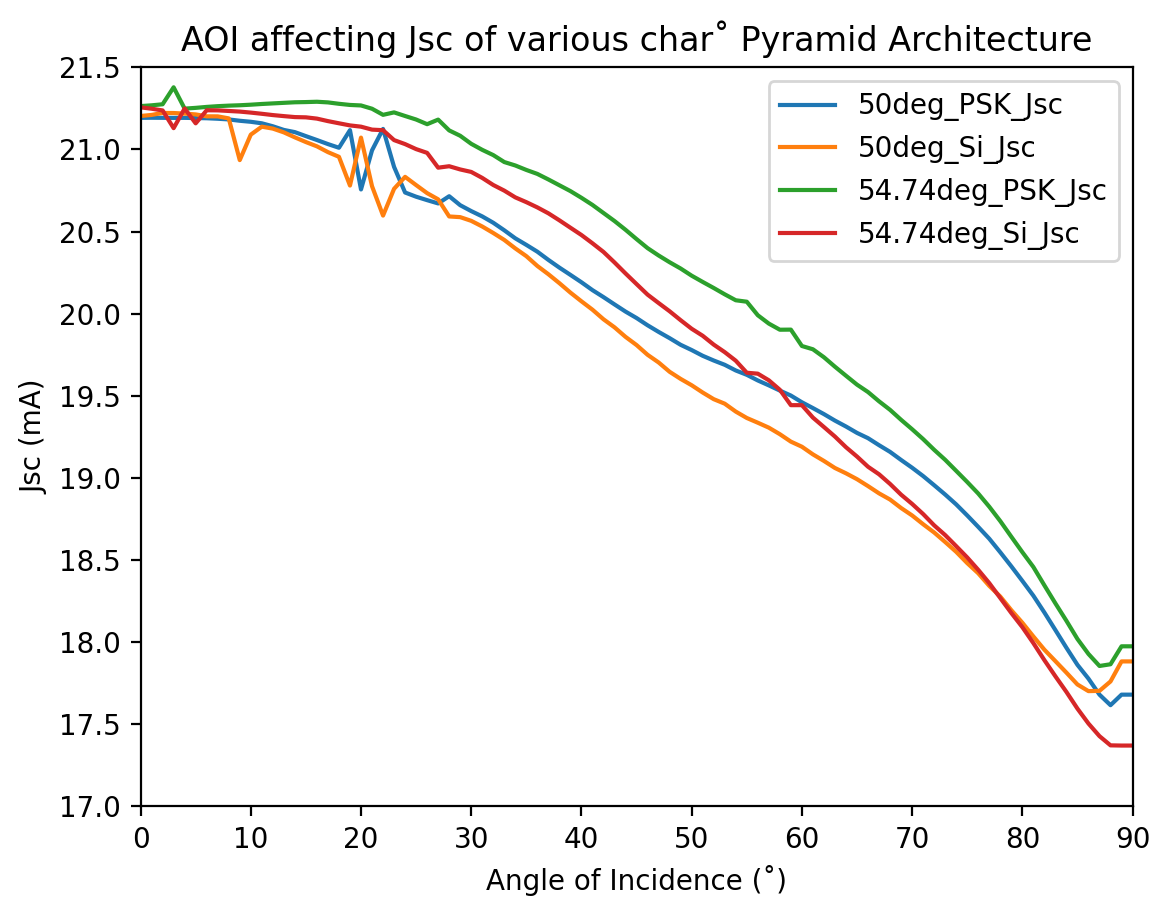

In [21]:
plt.plot(df_collect['AOI'], df_collect['50deg_PSK_Jsc'], label='50deg_PSK_Jsc')
plt.plot(df_collect['AOI'], df_collect['50deg_Si_Jsc'], label='50deg_Si_Jsc')

plt.plot(df_collect['AOI'], df_collect['54.74deg_PSK_Jsc'], label='54.74deg_PSK_Jsc')
plt.plot(df_collect['AOI'], df_collect['54.74deg_Si_Jsc'], label='54.74deg_Si_Jsc')


plt.title('AOI affecting Jsc of various char˚ Pyramid Architecture')
plt.ylim(17,21.5)
# plt.xticks(np.arange(300,1800,150))  
plt.xlim(0,90)
plt.xlabel('Angle of Incidence (˚)')
plt.ylabel('Jsc (mA)')
plt.legend(bbox_to_anchor=(1,1), loc="upper right")
plt.show() 




plt.show()

In [22]:
df_collect['50_PSK-Si'] = df_collect['50deg_PSK_Jsc']-df_collect['50deg_Si_Jsc']
df_collect['54.74_PSK-Si'] = df_collect['54.74deg_PSK_Jsc']-df_collect['54.74deg_Si_Jsc']

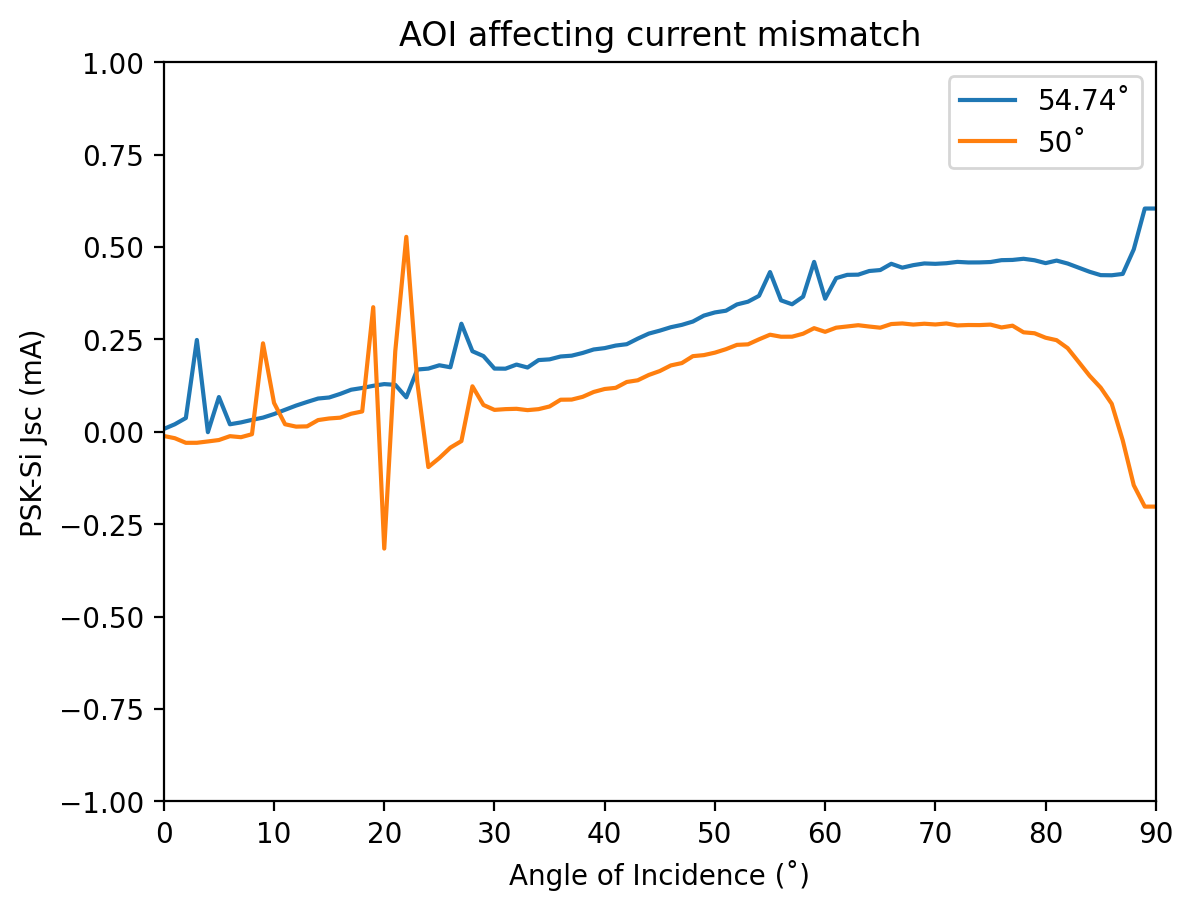

In [24]:
plt.plot(df_collect['AOI'], df_collect['54.74_PSK-Si'], label='54.74˚')
plt.plot(df_collect['AOI'], df_collect['50_PSK-Si'], label='50˚')

plt.title('AOI affecting current mismatch')
plt.ylim(-1,1)
# plt.xticks(np.arange(300,1800,150))  
plt.xlim(0,90)
plt.xlabel('Angle of Incidence (˚)')
plt.ylabel('PSK-Si Jsc (mA)')
plt.legend(bbox_to_anchor=(1,1), loc="upper right")
plt.show() 



plt.show()

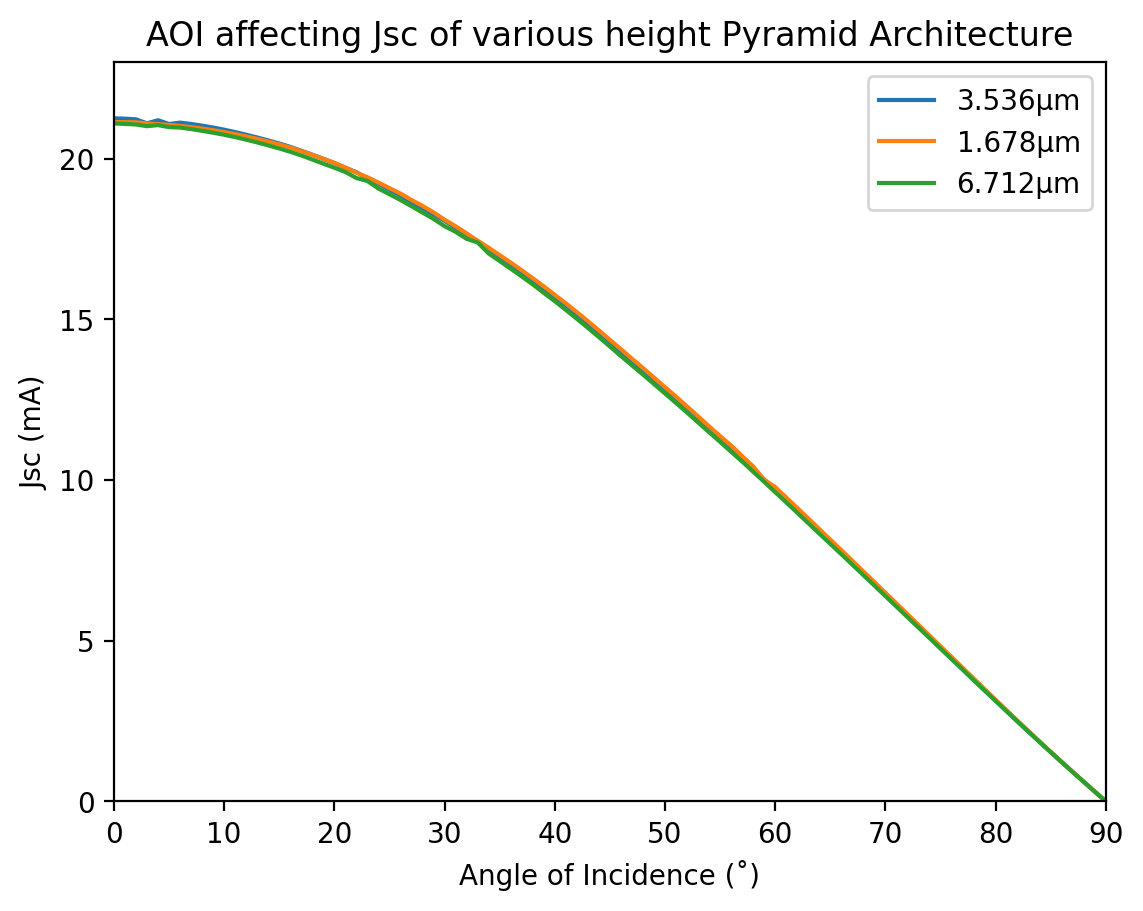

In [21]:
# plt.plot(df['AOI'], df['scaled_PSK_Jsc'], label='PSK')
# plt.plot(df['AOI'], df['scaled_Si_Jsc'], label='Si')
plt.plot(df_collect['AOI'], df_collect['3.536µm'], label='3.536µm')
plt.plot(df_collect['AOI'], df_collect['1.678µm'], label='1.678µm')
plt.plot(df_collect['AOI'], df_collect['6.712µm'], label='6.712µm')

plt.title('AOI affecting Jsc of various height Pyramid Architecture')
plt.ylim(0,23)
# plt.xticks(np.arange(300,1800,150))  
plt.xlim(0,90)
plt.xlabel('Angle of Incidence (˚)')
plt.ylabel('Jsc (mA)')
plt.legend(bbox_to_anchor=(1,1), loc="upper right")
plt.show() 

plt.show()

In [9]:
np.cos(np.deg2rad(90))

6.123233995736766e-17

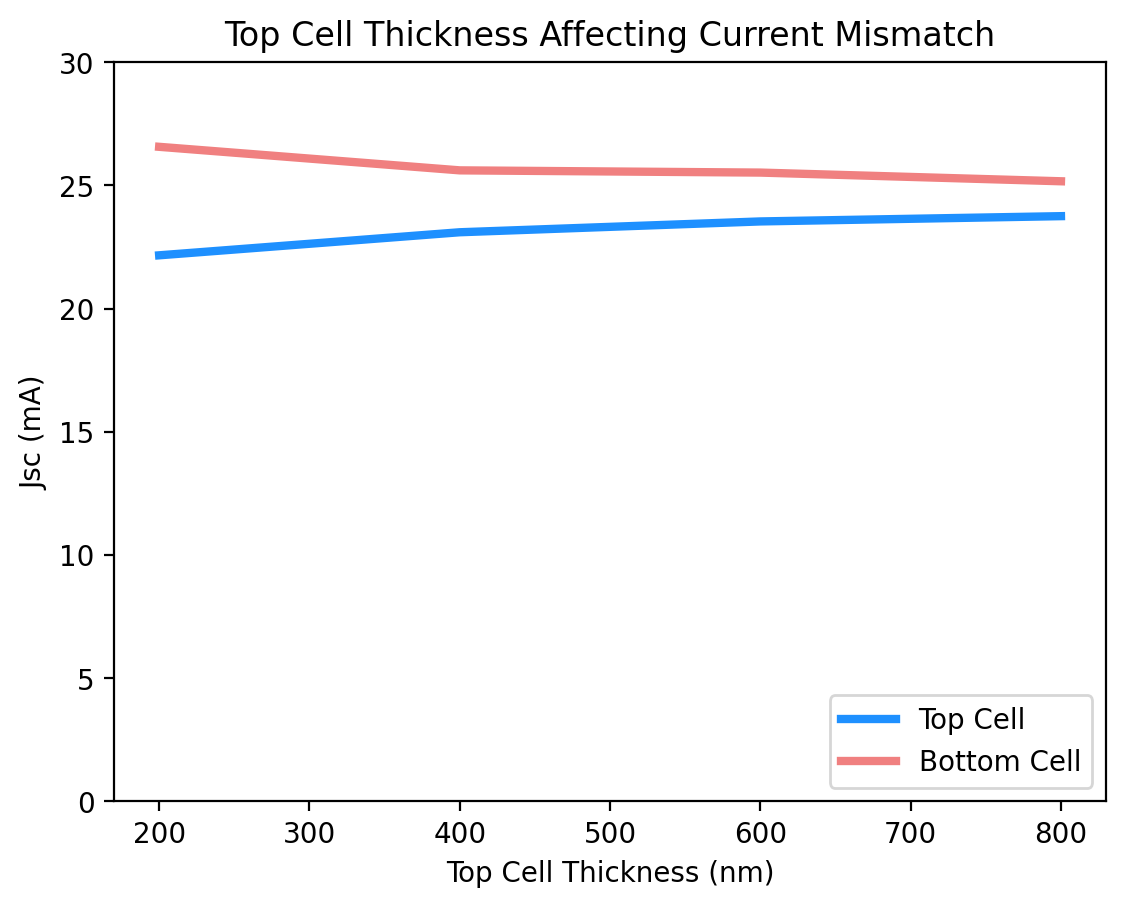

In [30]:
plt.plot(df['AOI'], df['PSK_Jsc'], label='Top Cell', color='dodgerblue', linewidth=3)
plt.plot(df['AOI'], df['Si_Jsc'], label='Bottom Cell', color='lightcoral', linewidth=3)


plt.title('Top Cell Thickness Affecting Current Mismatch')
plt.ylim(0, 30)
# plt.xticks(np.arange(300,1800,150))  
# plt.xlim(0,500)
plt.xlabel("Top Cell Thickness (nm)")
plt.ylabel('Jsc (mA)')
plt.legend(bbox_to_anchor=(1,0), loc="lower right")
plt.show() 


plt.show()

In [70]:
# result1 = pd.pivot(index = 'AOI', columns = 'PSK_Jsc' , values='PSK_Jsc')
# ax1=sns.heatmap(result1, annot=True, fmt ='.2f', cmap='Greens')
# plt.ylabel('Perovskite Thickness $(nm)$')
# plt.xlabel('Perovskite Bandgap $(eV)$')
# ax1.invert_yaxis()
# plt.title('Limited Tandem   $J_{sc}$ $ (mA)$')
# plt.show()

## Creating spectrum files for SETFOS

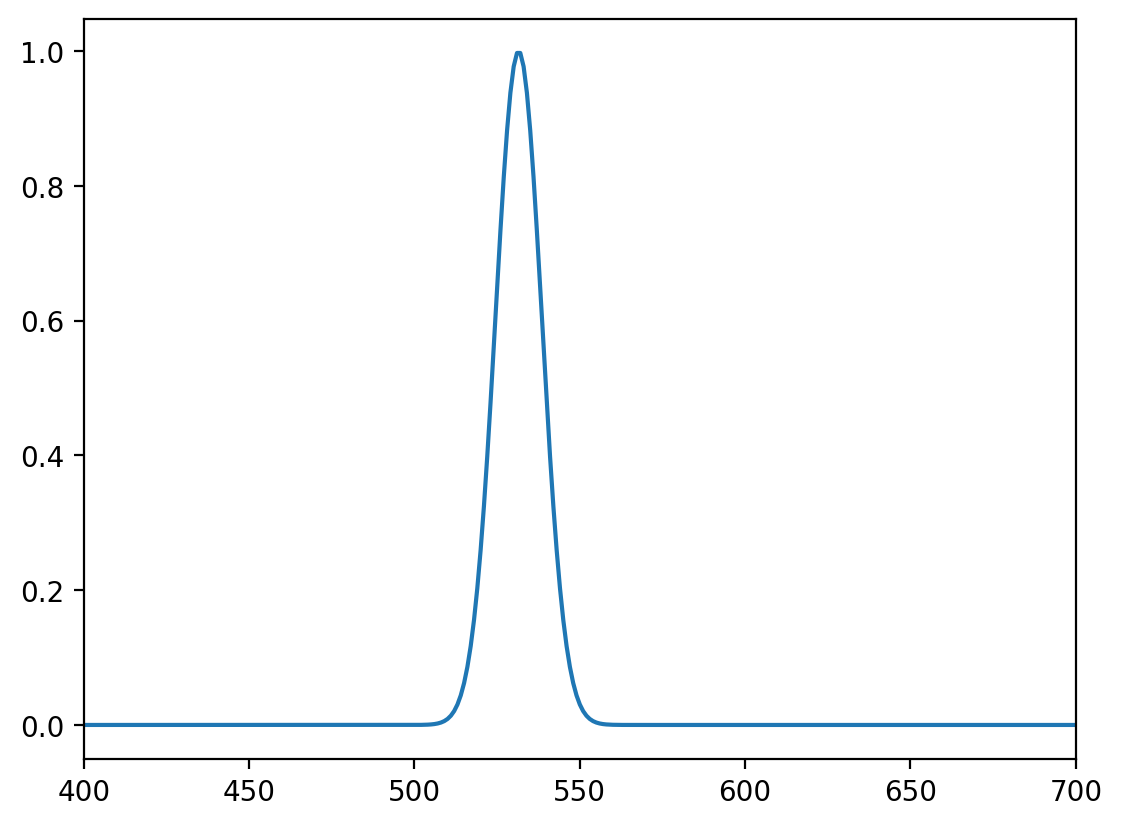

In [22]:
from scipy import signal
from scipy.fftpack import fft, fftshift


window = signal.gaussian(532*2, std=7)
plt.plot(window)
plt.xlim(400,700)
plt.show()
    

In [108]:
window=window*40

In [109]:
len(window)

520

In [110]:
x=np.arange(0, 520, 1)

In [111]:
x=x+1

In [2]:
2

2

In [7]:
plt.plot(x, window)
plt.show()

NameError: name 'x' is not defined

In [114]:
PSK_gap = pd.DataFrame({'wl':np.array(x), 'y':window})
# Gede_MAPI_Export
with open('spec.csv', 'w', newline='') as f:
    PSK_gap.to_csv(f, header=True, index=False)